## Pregunta 3: Metaestabilidad

Gracias al resultado de la pregunta 2, reemplazando $a(T - T_c) = -\frac{1}{2}$ y $F_4 = \frac{1}{4}$ sabemos que el sistema es biestable para $|B| \leq \sqrt{\frac{1}{3}}$. Ahora, implementemos el método numérico de la tarea 2:

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def partial_f(b, m):
    return -m + m**3 - b

def integrate_m(tf, dt, temp, b, m_0):
    n_steps = int(tf / dt)
    m = np.zeros(n_steps)
    t = np.arange(0, tf, dt)
    m[0] = m_0
    noise = np.random.normal(0, 1, n_steps)
    for i in range(1, n_steps):
        m[i] = m[i-1] - dt * partial_f(b, m[i-1]) + np.sqrt(2*dt*temp) * noise[i]
    return m, t

def run_and_plot_results(m_0, tf, dt, b, temp, num_runs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(num_runs):
        m, t = integrate_m(tf, dt, temp, b, m_0)
        ax.plot(t, m, alpha=0.5)
    ax.set_xlabel('Time')
    ax.set_ylabel('m')
    ax.set_title('Stochastic Dynamics of m')
    plt.show()
    return

### Caso $B = \sqrt{\frac{1}{3}} - 0.01, T = 1$

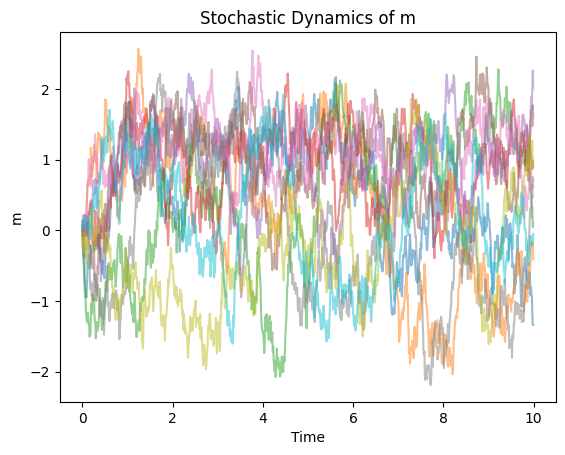

In [14]:
T = 1
b = np.sqrt(1/3) - 0.01
tf = 10.0
dt = 0.01
m_0 = 0.0


run_and_plot_results(m_0, tf, dt, b, T, 10)

Observemos que si bien la magnetización tiende a ser positiva, las fluctuaciones son suficientemente grandes como para que de todas maneras se exploren magnetizaciones negativas. Estudiemos ahora un caso dramáticamente distinto.

### Caso $B = \sqrt{\frac{1}{3}} - 0.01, T = 0.01$

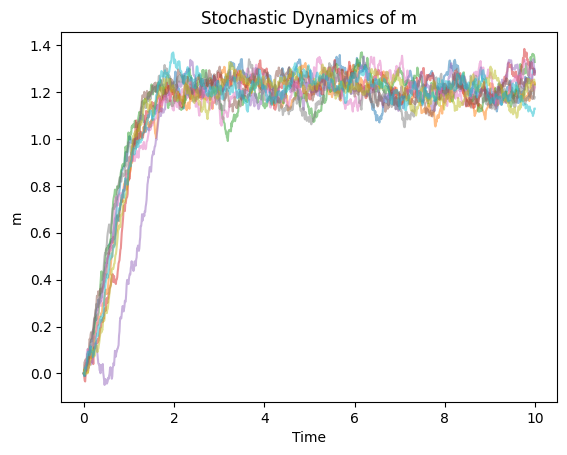

In [15]:
T = 0.01
b = np.sqrt(1/3) - 0.01
tf = 10.0
dt = 0.01
m_0 = 0.0


run_and_plot_results(m_0, tf, dt, b, T, 10)

Notamos que con fluctuaciones térmicas mucho menores, el sistema se encuentra siempre en el estado de magnetización positiva, pues la fluctuación típica no basta para superar la barrera de energía entre los mínimos de energía. Ahora estudiemos qué pasa con valores de $B$ pequeños.

### Caso $B = 0.01, T = 1$

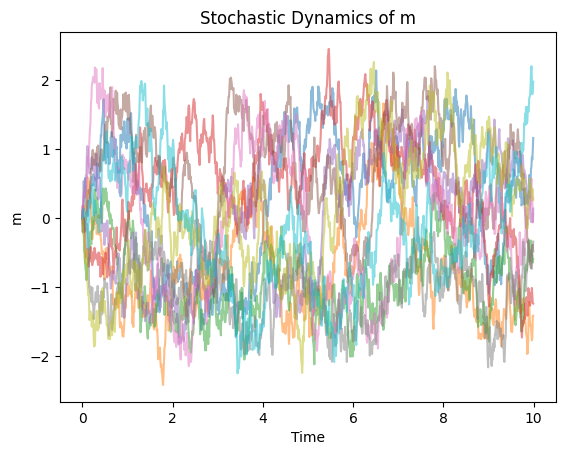

In [16]:
T = 1
b = 0.01
tf = 10.0
dt = 0.01
m_0 = 0.0


run_and_plot_results(m_0, tf, dt, b, T, 10)

Con un campo magnético mucho más débil, vemos que no hay una preferencia tan marcada para la magnetización positiva. Esto es de esperar pues es menor la diferencia de energía entre los mínimos (no así la barrera necesariamente, sino que el valor del mínimo). La temperatura en este caso basta para superar mediante las fluctuaciones la barrera de energía, veamos qué pasa si bajamos la temperatura.

### Caso $B = 0.01, T = 0.01$

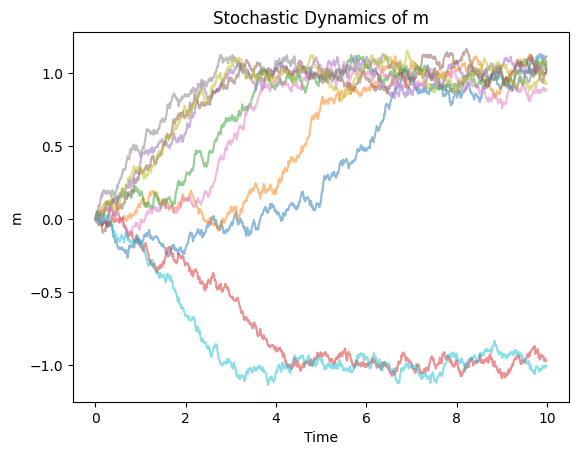

In [17]:
T = 0.01
b = 0.01
tf = 10.0
dt = 0.01
m_0 = 0.0


run_and_plot_results(m_0, tf, dt, b, T, 10)

Ahora, interesantemente, vemos que como el campo es suficientemente débil algunos sistemas caen en el mínimo local de energía con magnetización negativa, sólo debido a la dinámica estocástica. Esto habla de la metaestabilidad presente en el sistema, no siempre vamos a escoger el mínimo global de energía. Las fluctuaciones térmicas en este caso tampoco son suficientes para superar la barrera de energía entre los mínimos.